#Import Libraries

In [ ]:
# Data manipulation
library(dplyr)
library(tidyr)
library(data.table)

# Numerical operations
library(Matrix)

# File operations
library(fs)

# Visualization
library(ggplot2)

# Evaluation metrics
install.packages("Metrics")
library(Metrics)
install.packages("caret")
library(caret)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice


Attaching package: ‘caret’


The following obje

#Import Data

##Authorize Account

In [ ]:
# Install and load the necessary packages
if (!require(googledrive)) install.packages("googledrive")
if (!require(readr)) install.packages("readr")

library(googledrive)
library(readr)

# Authenticate and mount Google Drive (only required if you're working in Colab)
drive_auth()

Loading required package: googledrive

Loading required package: readr

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=4c64f957da222d492a7691c31cbdbc87&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWFuUlJydW9lOWZyWDlaNmNJOXRMeVZKbXJHazVRTlNEczRMTklBRUlueHZWUFJsZFhfaGx6d2lQX08tTkhoR0hnZHBjQSIsInN0YXRlIjoiNGM2NGY5NTdkYTIyMmQ0OTJhNzY5MWMzMWNiZGJjODcifQ==


##Mounting Files

In [ ]:
# Locate the folder ID for 'TextMining'
folder_name <- "Shared_Alzheimers_Drive"  # Change this to your specific folder name
folder_info <- drive_find(folder_name, type = "folder")

if (nrow(folder_info) > 0) {
  folder_id <- folder_info$id[1]  # Assuming there's only one folder with this name

  # Now search for CSV files within this folder
  file_list <- drive_ls(as_id(folder_id), type = "csv")

  # Check if any CSV files are found
  csv_files <- file_list$name
  print(csv_files)

  if (length(csv_files) > 0) {
    # Get the file ID of the first CSV file
    alz_file_id <- file_list$id[1]

    # Download the CSV file to the local environment
    drive_download(as_id(alz_file_id), path = "alzheimers_disease_data.csv", overwrite = TRUE)

    # Read the downloaded CSV file
    alzheimers_data <- read_csv("alzheimers_disease_data.csv")

    # Display column names and dimensions
    print(names(alzheimers_data))
    print(dim(alzheimers_data))
  } else {
    print("No CSV files found in the specified directory.")
  }
} else {
  print("Folder not found. Check the folder name.")
}

[1] "alzheimers_disease_data.csv"


File downloaded:

• alzheimers_disease_data.csv <id: 1Z81UI2ILAbRuSkS9fRURgpJwhUYJPgFx>

Saved locally as:

• alzheimers_disease_data.csv

Rows: 2149 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): DoctorInCharge
dbl (34): PatientID, Age, Gender, Ethnicity, EducationLevel, BMI, Smoking, A...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 [1] "PatientID"                 "Age"                      
 [3] "Gender"                    "Ethnicity"                
 [5] "EducationLevel"            "BMI"                      
 [7] "Smoking"                   "AlcoholConsumption"       
 [9] "PhysicalActivity"          "DietQuality"              
[11] "SleepQuality"              "FamilyHistoryAlzheimers"  
[13] "CardiovascularDisease"     "Diabetes"                 
[15] "Depression"                "HeadInjury"               
[17] "Hypertension"              "SystolicBP"               
[19] "DiastolicBP"               "CholesterolTotal"         
[21] "CholesterolLDL"            "CholesterolHDL"           
[23] "CholesterolTriglycerides"  "MMSE"                     
[25] "FunctionalAssessment"      "MemoryComplaints"         
[27] "BehavioralProblems"        "ADL"                      
[29] "Confusion"                 "Disorientation"           
[31] "PersonalityChanges"        "DifficultyCompletingTasks"
[33] "Forgetfulness"    

In [ ]:
# Initialize alz_df from the downloaded CSV file
alz_df <- alzheimers_data

# Preview the first few rows
head(alz_df)

# Summary statistics
summary(alz_df)

PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,⋯,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
4751,73,0,0,2,22.92775,0,13.297218,6.3271125,1.3472143,⋯,0,0,1.72588346,0,0,0,1,0,0,XXXConfid
4752,89,0,0,0,26.82768,0,4.542524,7.6198845,0.5187671,⋯,0,0,2.59242413,0,0,0,0,1,0,XXXConfid
4753,73,0,3,1,17.79588,0,19.555085,7.8449878,1.8263347,⋯,0,0,7.11954774,0,1,0,1,0,0,XXXConfid
4754,74,1,0,1,33.80082,1,12.209266,8.4280014,7.4356041,⋯,0,1,6.48122586,0,0,0,0,0,0,XXXConfid
4755,89,0,0,0,20.71697,0,18.454356,6.3104607,0.7954975,⋯,0,0,0.01469122,0,0,1,1,0,0,XXXConfid
4756,86,1,1,1,30.62689,0,4.140144,0.2110616,1.5849220,⋯,0,0,9.01568628,1,0,0,0,0,0,XXXConfid


   PatientID         Age            Gender         Ethnicity     
 Min.   :4751   Min.   :60.00   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:5288   1st Qu.:67.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :5825   Median :75.00   Median :1.0000   Median :0.0000  
 Mean   :5825   Mean   :74.91   Mean   :0.5063   Mean   :0.6975  
 3rd Qu.:6362   3rd Qu.:83.00   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :6899   Max.   :90.00   Max.   :1.0000   Max.   :3.0000  
 EducationLevel       BMI           Smoking       AlcoholConsumption 
 Min.   :0.000   Min.   :15.01   Min.   :0.0000   Min.   : 0.002003  
 1st Qu.:1.000   1st Qu.:21.61   1st Qu.:0.0000   1st Qu.: 5.139810  
 Median :1.000   Median :27.82   Median :0.0000   Median : 9.934412  
 Mean   :1.287   Mean   :27.66   Mean   :0.2885   Mean   :10.039442  
 3rd Qu.:2.000   3rd Qu.:33.87   3rd Qu.:1.0000   3rd Qu.:15.157931  
 Max.   :3.000   Max.   :39.99   Max.   :1.0000   Max.   :19.989293  
 PhysicalActivity    DietQuality        SleepQua

#Define Engineered Features/Aggregate Factors

In [ ]:
# High Cholesterol
cholesterolIndex <- function(CholesterolTotal, CholesterolLDL) {
  if (CholesterolTotal >= 200 || CholesterolLDL >= 100) {
    return(1)
  } else {
    return(0)
  }
}

# Obesity Index
obesityIndex <- function(BMI) {
  if (BMI >= 30) {
    return(1)
  } else {
    return(0)
  }
}

# Health Index
healthIndex <- function(BMI, SystolicBP, DiastolicBP, CholesterolTotal) {
  return(BMI + SystolicBP + DiastolicBP + CholesterolTotal)
}

# Lifestyle Index
lifestyleIndex <- function(DietQuality, PhysicalActivity, Smoking, Alcohol) {
  return((DietQuality + PhysicalActivity - (Smoking + Alcohol)) / 4)
}

# Comorbidity Index
comorbidityIndex <- function(Hypertension, Diabetes, HeartDisease) {
  return(Hypertension + Diabetes + HeartDisease)
}


#

In [ ]:
# Assuming alz_df is a data frame in R

alz_df$CholesterolIndex <- mapply(cholesterolIndex,
                                  alz_df$CholesterolTotal,
                                  alz_df$CholesterolLDL)

alz_df$ObesityIndex <- mapply(obesityIndex, alz_df$BMI)

alz_df$HealthIndex <- mapply(healthIndex,
                             alz_df$BMI,
                             alz_df$SystolicBP,
                             alz_df$DiastolicBP,
                             alz_df$CholesterolTotal)

alz_df$LifestyleIndex <- mapply(lifestyleIndex,
                                alz_df$DietQuality,
                                alz_df$PhysicalActivity,
                                alz_df$Smoking,
                                alz_df$AlcoholConsumption)

alz_df$ComorbidityIndex <- mapply(comorbidityIndex,
                                  alz_df$Hypertension,
                                  alz_df$Diabetes,
                                  alz_df$CardiovascularDisease)


In [ ]:
# Drop the column 'DoctorInCharge'
alz_df <- alz_df[, !names(alz_df) %in% "DoctorInCharge"]

# Display the first 10 rows
head(alz_df, 10)


PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,⋯,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,CholesterolIndex,ObesityIndex,HealthIndex,LifestyleIndex,ComorbidityIndex
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4751,73,0,0,2,22.92775,0,13.2972177,6.3271125,1.3472143,⋯,0,0,1,0,0,1,0,479.2946,-1.4057227,1
4752,89,0,0,0,26.82768,0,4.5425238,7.6198845,0.5187671,⋯,0,0,0,1,0,1,0,436.9903,0.8990320,0
4753,73,0,3,1,17.79588,0,19.5550845,7.8449878,1.8263347,⋯,1,0,1,0,0,1,0,516.9777,-2.4709405,0
4754,74,1,0,1,33.80082,1,12.2092655,8.4280014,7.4356041,⋯,0,0,0,0,0,0,1,426.3831,0.6635850,0
4755,89,0,0,0,20.71697,0,18.4543561,6.3104607,0.7954975,⋯,0,1,1,0,0,1,0,469.3192,-2.8370995,0
4756,86,1,1,1,30.62689,0,4.1401438,0.2110616,1.5849220,⋯,0,0,0,0,0,1,1,541.3394,-0.5860400,1
4757,68,0,3,2,38.38762,1,0.6460473,9.2576949,5.8973879,⋯,0,0,0,1,0,1,1,533.1218,3.3772589,0
4758,75,0,0,1,18.77601,0,13.7238257,4.6494507,8.3419032,⋯,0,0,0,1,1,0,0,350.1591,-0.1831180,0
4759,72,1,1,0,27.83319,0,12.1678476,1.5313598,6.7368820,⋯,0,1,0,0,0,1,0,497.4389,-0.9749014,1


In [ ]:
# Health Index Data Frames
HIA <- alz_df[alz_df$Diagnosis == 1, "HealthIndex"]  # With Alzheimer's
HIWA <- alz_df[alz_df$Diagnosis == 0, "HealthIndex"] # Without Alzheimer's

# Lifestyle Index Data Frames
LIA <- alz_df[alz_df$Diagnosis == 1, "LifestyleIndex"]  # With Alzheimer's
LIWA <- alz_df[alz_df$Diagnosis == 0, "LifestyleIndex"] # Without Alzheimer's

# Comorbidity Index Data Frames
CIA <- alz_df[alz_df$Diagnosis == 1, "ComorbidityIndex"]  # With Alzheimer's
CWA <- alz_df[alz_df$Diagnosis == 0, "ComorbidityIndex"] # Without Alzheimer's


In [ ]:
library(dplyr)

# Correct Initialization
HIA <- as_tibble(alz_df[alz_df$Diagnosis == 1, "HealthIndex"])
HIWA <- as_tibble(alz_df[alz_df$Diagnosis == 0, "HealthIndex"])

AgeA <- as_tibble(alz_df[alz_df$Diagnosis == 1, "Age"])
AgeW <- as_tibble(alz_df[alz_df$Diagnosis == 0, "Age"])

BMI <- as_tibble(alz_df[alz_df$Diagnosis == 1, "BMI"])
BMIW <- as_tibble(alz_df[alz_df$Diagnosis == 0, "BMI"])

AlA <- as_tibble(alz_df[alz_df$Diagnosis == 1, "AlcoholConsumption"])
AlW <- as_tibble(alz_df[alz_df$Diagnosis == 0, "AlcoholConsumption"])

PhysicalA <- as_tibble(alz_df[alz_df$Diagnosis == 1, "PhysicalActivity"])
PhysicalW <- as_tibble(alz_df[alz_df$Diagnosis == 0, "PhysicalActivity"])

DietA <- as_tibble(alz_df[alz_df$Diagnosis == 1, "DietQuality"])
DietW <- as_tibble(alz_df[alz_df$Diagnosis == 0, "DietQuality"])

SleepA <- as_tibble(alz_df[alz_df$Diagnosis == 1, "SleepQuality"])
SleepW <- as_tibble(alz_df[alz_df$Diagnosis == 0, "SleepQuality"])


In [ ]:
# Cholesterol Index Proportion
CholIndProp <- sum(alz_df$Diagnosis == 1 & alz_df$CholesterolIndex == 1) / nrow(alz_df)
cat(sprintf("Cholesterol Index: %.4f\n", CholIndProp))

# Obesity Index Proportion
ObIndProp <- sum(alz_df$Diagnosis == 1 & alz_df$ObesityIndex == 1) / nrow(alz_df)
cat(sprintf("Obesity Index: %.4f\n", ObIndProp))

# Smoking Index Proportion
SmokIndProp <- sum(alz_df$Diagnosis == 1 & alz_df$Smoking == 1) / nrow(alz_df)
cat(sprintf("Smoking Index: %.4f\n", SmokIndProp))

# Education Level Proportion
EdIndProp <- sum(alz_df$Diagnosis == 1 & alz_df$EducationLevel == 1) / nrow(alz_df)
cat(sprintf("Education Proportion: %.4f\n", EdIndProp))


Cholesterol Index: 0.3150
Obesity Index: 0.1498
Smoking Index: 0.1010
Education Proportion: 0.1405


##Perform a bootstrap on the non-binary-Engineered indexes (For both Alz and non Alz)

##Perform a Bootstrap on the non-binary non-engineered features

In [ ]:
# Univariate bootstraping
# Perform a bootstrap on the non-binary-Engineered indexes (For both Alz and non Alz)
bootstrapHealthA <- replicate(1000, HIA %>% sample_frac(replace = TRUE), simplify = FALSE)
bootstrapHealthNA <- replicate(1000, HIWA %>% sample_frac(replace = TRUE), simplify = FALSE)

bootstrapLifeA <- replicate(1000, LIA %>% sample_frac(replace = TRUE), simplify = FALSE)
bootstrapLifeNA <- replicate(1000, LIWA %>% sample_frac(replace = TRUE), simplify = FALSE)

bootstrapCIA <- replicate(1000, CIA %>% sample_frac(replace = TRUE), simplify = FALSE)
bootstrapCWA <- replicate(1000, CWA %>% sample_frac(replace = TRUE), simplify = FALSE)

# Perform a Bootstrap on the non-binary non-engineered features
bootstrapAgeA <- replicate(1000, AgeA %>% sample_frac(replace = TRUE), simplify = FALSE)
bootstrapAgeW <- replicate(1000, AgeW %>% sample_frac(replace = TRUE), simplify = FALSE)

bootstrapBMIA <- replicate(1000, BMI %>% sample_frac(replace = TRUE), simplify = FALSE)
bootstrapBMIW <- replicate(1000, BMIW %>% sample_frac(replace = TRUE), simplify = FALSE)

bootstrapAlA <- replicate(1000, AlA %>% sample_frac(replace = TRUE), simplify = FALSE)
bootstrapALW <- replicate(1000, AlW %>% sample_frac(replace = TRUE), simplify = FALSE)

bootstrapPhysA <- replicate(1000, PhysicalA %>% sample_frac(replace = TRUE), simplify = FALSE)
bootstrapPhysW <- replicate(1000, PhysicalW %>% sample_frac(replace = TRUE), simplify = FALSE)

bootstrapDietA <- replicate(1000, DietA %>% sample_frac(replace = TRUE), simplify = FALSE)
bootstrapDietW <- replicate(1000, DietW %>% sample_frac(replace = TRUE), simplify = FALSE)

bootstrapSleepA <- replicate(1000, SleepA %>% sample_frac(replace = TRUE), simplify = FALSE)
bootstrapSleepW <- replicate(1000, SleepW %>% sample_frac(replace = TRUE), simplify = FALSE)

In [ ]:
# Create a distribution of the means - Engineered
MeansHealthA <- sapply(bootstrapHealthA, function(df) mean(df$HealthIndex))
MeansHealthNA <- sapply(bootstrapHealthNA, function(df) mean(df$HealthIndex))
MeansLifeA <- sapply(bootstrapLifeA, function(df) mean(df$LifestyleIndex))
MeansLifeNA <- sapply(bootstrapLifeNA, function(df) mean(df$LifestyleIndex))
MeansComA <- sapply(bootstrapCIA, function(df) mean(df$ComorbidityIndex))
MeansComNA <- sapply(bootstrapCWA, function(df) mean(df$ComorbidityIndex))
MeansSlpA <- sapply(bootstrapSleepA, function(df) mean(df$SleepQuality))
MeansSlpNA <- sapply(bootstrapSleepW, function(df) mean(df$SleepQuality))

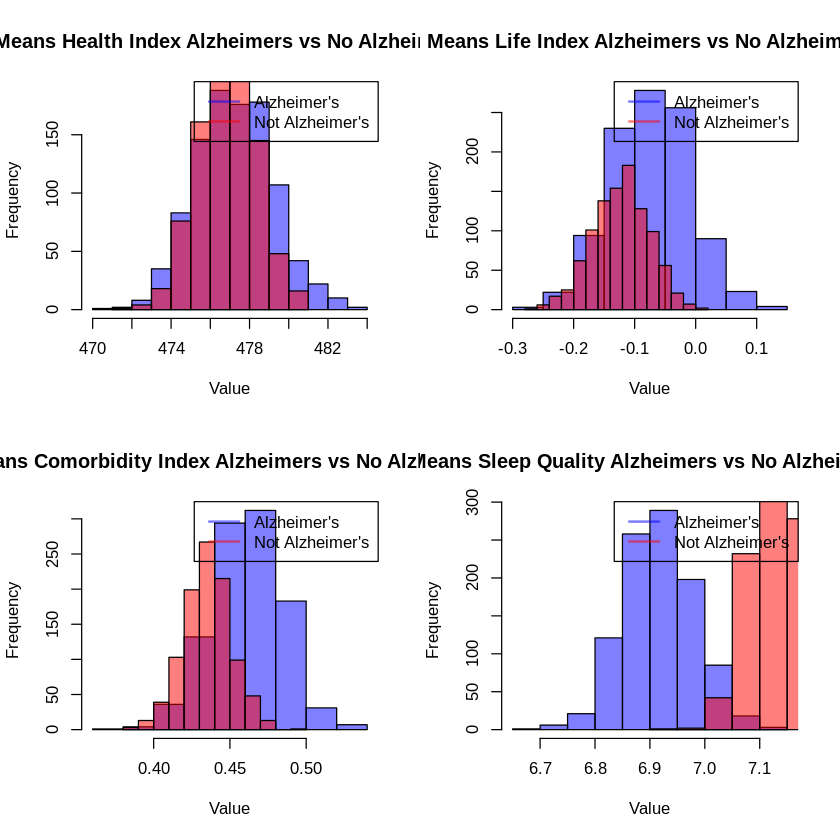

In [ ]:
# Generate Histograms for Engineered Features
par(mfrow = c(2, 2))

hist(MeansHealthA, main = "Means Health Index Alzheimers vs No Alzheimers", xlab = "Value", col = rgb(0, 0, 1, 0.5), border = "black")
hist(MeansHealthNA, col = rgb(1, 0, 0, 0.5), border = "black", add = TRUE)
legend("topright", legend = c("Alzheimer's", "Not Alzheimer's"), col = c(rgb(0, 0, 1, 0.5), rgb(1, 0, 0, 0.5)), lwd = 2)

hist(MeansLifeA, main = "Means Life Index Alzheimers vs No Alzheimers", xlab = "Value", col = rgb(0, 0, 1, 0.5), border = "black")
hist(MeansLifeNA, col = rgb(1, 0, 0, 0.5), border = "black", add = TRUE)
legend("topright", legend = c("Alzheimer's", "Not Alzheimer's"), col = c(rgb(0, 0, 1, 0.5), rgb(1, 0, 0, 0.5)), lwd = 2)

hist(MeansComA, main = "Means Comorbidity Index Alzheimers vs No Alzheimers", xlab = "Value", col = rgb(0, 0, 1, 0.5), border = "black")
hist(MeansComNA, col = rgb(1, 0, 0, 0.5), border = "black", add = TRUE)
legend("topright", legend = c("Alzheimer's", "Not Alzheimer's"), col = c(rgb(0, 0, 1, 0.5), rgb(1, 0, 0, 0.5)), lwd = 2)

hist(MeansSlpA, main = "Means Sleep Quality Alzheimers vs No Alzheimers", xlab = "Value", col = rgb(0, 0, 1, 0.5), border = "black")
hist(MeansSlpNA, col = rgb(1, 0, 0, 0.5), border = "black", add = TRUE)
legend("topright", legend = c("Alzheimer's", "Not Alzheimer's"), col = c(rgb(0, 0, 1, 0.5), rgb(1, 0, 0, 0.5)), lwd = 2)

In [ ]:
# Create a distribution of the means - Non-Engineered
MeansAgeA <- sapply(bootstrapAgeA, function(df) mean(df$Age))
MeansAgeW <- sapply(bootstrapAgeW, function(df) mean(df$Age))
MeansBMIA <- sapply(bootstrapBMIA, function(df) mean(df$BMI))
MeansBMIW <- sapply(bootstrapBMIW, function(df) mean(df$BMI))
MeansALA <- sapply(bootstrapAlA, function(df) mean(df$AlcoholConsumption))
MeansALW <- sapply(bootstrapALW, function(df) mean(df$AlcoholConsumption))
MeansPhysA <- sapply(bootstrapPhysA, function(df) mean(df$PhysicalActivity))
MeansPhysW <- sapply(bootstrapPhysW, function(df) mean(df$PhysicalActivity))
MeansDietA <- sapply(bootstrapDietA, function(df) mean(df$DietQuality))
MeansDietW <- sapply(bootstrapDietW, function(df) mean(df$DietQuality))

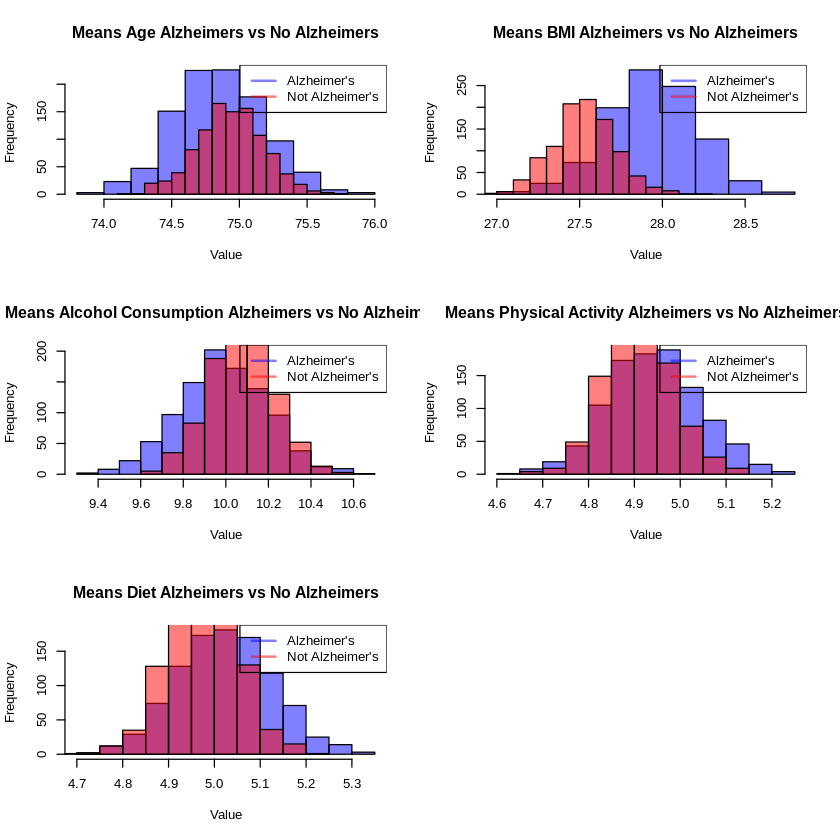

In [ ]:
par(mfrow = c(3, 2))

hist(MeansAgeA, main = "Means Age Alzheimers vs No Alzheimers", xlab = "Value", col = rgb(0, 0, 1, 0.5), border = "black")
hist(MeansAgeW, col = rgb(1, 0, 0, 0.5), border = "black", add = TRUE)
legend("topright", legend = c("Alzheimer's", "Not Alzheimer's"), col = c(rgb(0, 0, 1, 0.5), rgb(1, 0, 0, 0.5)), lwd = 2)

hist(MeansBMIA, main = "Means BMI Alzheimers vs No Alzheimers", xlab = "Value", col = rgb(0, 0, 1, 0.5), border = "black")
hist(MeansBMIW, col = rgb(1, 0, 0, 0.5), border = "black", add = TRUE)
legend("topright", legend = c("Alzheimer's", "Not Alzheimer's"), col = c(rgb(0, 0, 1, 0.5), rgb(1, 0, 0, 0.5)), lwd = 2)

hist(MeansALA, main = "Means Alcohol Consumption Alzheimers vs No Alzheimers", xlab = "Value", col = rgb(0, 0, 1, 0.5), border = "black")
hist(MeansALW, col = rgb(1, 0, 0, 0.5), border = "black", add = TRUE)
legend("topright", legend = c("Alzheimer's", "Not Alzheimer's"), col = c(rgb(0, 0, 1, 0.5), rgb(1, 0, 0, 0.5)), lwd = 2)

hist(MeansPhysA, main = "Means Physical Activity Alzheimers vs No Alzheimers", xlab = "Value", col = rgb(0, 0, 1, 0.5), border = "black")
hist(MeansPhysW, col = rgb(1, 0, 0, 0.5), border = "black", add = TRUE)
legend("topright", legend = c("Alzheimer's", "Not Alzheimer's"), col = c(rgb(0, 0, 1, 0.5), rgb(1, 0, 0, 0.5)), lwd = 2)

hist(MeansDietA, main = "Means Diet Alzheimers vs No Alzheimers", xlab = "Value", col = rgb(0, 0, 1, 0.5), border = "black")
hist(MeansDietW, col = rgb(1, 0, 0, 0.5), border = "black", add = TRUE)
legend("topright", legend = c("Alzheimer's", "Not Alzheimer's"), col = c(rgb(0, 0, 1, 0.5), rgb(1, 0, 0, 0.5)), lwd = 2)


#Logistic Regression Analysis

In [ ]:
# Load necessary libraries
library(caret)
library(dplyr)
install.packages("glmnet")
library(glmnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’


Loaded glmnet 4.1-8



In [ ]:
# Define the columns to drop
columns_to_drop <- c( "Age", "Gender", "Ethnicity",
                     "MMSE", "FunctionalAssessment", "MemoryComplaints",
                     "BehavioralProblems", "ADL", "Confusion",
                     "Disorientation", "PersonalityChanges",
                     "DifficultyCompletingTasks", "Forgetfulness"
                     )

# Drop the specified columns
RelevantDF <- alz_df[, setdiff(names(alz_df), columns_to_drop)]


In [ ]:
# Drop PatientID and Diagnosis
X <- alz_df %>% select(-PatientID, -Diagnosis)
y <- alz_df$Diagnosis

# Identify numerical and categorical columns
numerical_cols <- names(X)[sapply(X, is.numeric)]
categorical_cols <- names(X)[sapply(X, is.factor)]

# Preprocess data: Scale numerical and encode categorical features
preprocess <- preProcess(X[numerical_cols], method = c("center", "scale"))
X_scaled <- predict(preprocess, X[numerical_cols])

# One-hot encoding for categorical features
if (length(categorical_cols) > 0) {
  X_encoded <- model.matrix(~ . - 1, data = X[categorical_cols, , drop = FALSE])
} else {
  X_encoded <- NULL
}

# Combine scaled and encoded features
if (!is.null(X_encoded)) {
  X_preprocessed <- as.matrix(cbind(X_scaled, X_encoded))
} else {
  X_preprocessed <- as.matrix(X_scaled)
}

# Load required library
library(pROC)

# Cross-validation setup
set.seed(42)
cv_folds <- createFolds(y, k = 5, list = TRUE)

# Perform cross-validation for L1 Regularization (Lasso)
cv_results <- lapply(cv_folds, function(train_idx) {
  X_train <- X_preprocessed[train_idx, , drop = FALSE]
  y_train <- y[train_idx]
  X_test <- X_preprocessed[-train_idx, , drop = FALSE]
  y_test <- y[-train_idx]

  # Train the model
  logistic_model <- cv.glmnet(X_train, y_train, family = "binomial", alpha = 1)

  # Make predictions
  predictions <- predict(logistic_model, X_test, s = "lambda.min", type = "response")

  # Calculate performance (e.g., AUC)
  auc_score <- roc(y_test, predictions)$auc
  list(model = logistic_model, auc = auc_score)
})

# Extract average AUC
average_auc <- mean(sapply(cv_results, function(res) res$auc))
cat("Average AUC from cross-validation:", average_auc, "\n")

# Extract feature importances from final model
final_model <- cv_results[[which.max(sapply(cv_results, function(res) res$auc))]]$model
coefficients <- as.vector(coef(final_model, s = "lambda.min")[-1])

# Combine feature names and coefficients
all_feature_names <- colnames(X_preprocessed)
feature_importances <- data.frame(
  Feature = all_feature_names,
  Coefficient = coefficients
) %>% arrange(desc(Coefficient))

# Display top 10 positive and negative features
cat("Top 10 features with positive correlation:\n")
print(head(feature_importances, 10))

cat("\nTop 10 features with inverse correlation:\n")
print(tail(feature_importances, 10))


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following object is masked from ‘package:Metrics’:

    auc


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = 0, case = 1

Warning message in roc.default(y_test, predictions):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases

Setting levels: control = 0, case = 1

Warning message in roc.default(y_test, predictions):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases

Setting levels: control = 0, case = 1

Warning message in roc.default(y_test, predictions):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases

Setting levels: control = 0, case = 1

Warning message in roc.default(y_test, pr

Average AUC from cross-validation: 0.8937192 
Top 10 features with positive correlation:
              Feature  Coefficient
1    MemoryComplaints 0.7889297037
2  BehavioralProblems 0.6662374078
3      CholesterolHDL 0.2156310816
4       Forgetfulness 0.0748945811
5                 Age 0.0131904042
6    CholesterolTotal 0.0043117431
7      LifestyleIndex 0.0009711579
8              Gender 0.0000000000
9      EducationLevel 0.0000000000
10            Smoking 0.0000000000

Top 10 features with inverse correlation:
                Feature Coefficient
28     ComorbidityIndex  0.00000000
29           SystolicBP -0.03337941
30            Confusion -0.06729025
31       CholesterolLDL -0.07769664
32       Disorientation -0.10101350
33                  BMI -0.10793121
34            Ethnicity -0.18126137
35                 MMSE -0.65702573
36                  ADL -0.82644340
37 FunctionalAssessment -0.97794284


#Random Forest

In [ ]:
# Load necessary libraries
library(caret)
install.packages("randomForest")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine




In [ ]:
# Prepare features and target
X <- alz_df %>% select(-PatientID, -Diagnosis)
y <- alz_df$Diagnosis

# Train-test split
set.seed(42)
train_idx <- createDataPartition(y, p=0.8, list=FALSE)
X_train <- X[train_idx, ]
X_test <- X[-train_idx, ]
y_train <- y[train_idx]
y_test <- y[-train_idx]

# Train Random Forest model
rf_model <- randomForest(X_train, as.factor(y_train), ntree=100, random_state=42)

# Predict on test data
y_pred <- predict(rf_model, X_test)
y_pred_proba <- predict(rf_model, X_test, type="prob")[, 2]

# Evaluate the model
cat("Classification Report:\n")
conf_matrix <- confusionMatrix(as.factor(y_pred), as.factor(y_test))
print(conf_matrix)

Classification Report:
Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 266  17
         1   7 139
                                          
               Accuracy : 0.9441          
                 95% CI : (0.9179, 0.9638)
    No Information Rate : 0.6364          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.8774          
                                          
 Mcnemar's Test P-Value : 0.06619         
                                          
            Sensitivity : 0.9744          
            Specificity : 0.8910          
         Pos Pred Value : 0.9399          
         Neg Pred Value : 0.9521          
             Prevalence : 0.6364          
         Detection Rate : 0.6200          
   Detection Prevalence : 0.6597          
      Balanced Accuracy : 0.9327          
                                          
       'Positive' Class : 0               
       

In [ ]:
# Extract feature importances
importance_scores <- as.data.frame(importance(rf_model))

# Combine feature names and importances
feature_importances <- data.frame(
  Feature = rownames(importance_scores),
  Importance = importance_scores$MeanDecreaseGini
) %>% arrange(desc(Importance))

# Display feature importances
cat("Top 10 highest correlated features:\n")
print(head(feature_importances, 10))

cat("\nTop 10 lowest correlated features:\n")
print(tail(feature_importances, 10))


Top 10 highest correlated features:
                    Feature Importance
1      FunctionalAssessment  147.18284
2                       ADL  133.78409
3                      MMSE   89.39524
4          MemoryComplaints   61.81743
5        BehavioralProblems   39.40063
6            CholesterolHDL   21.11990
7          PhysicalActivity   20.57989
8               DietQuality   20.43365
9  CholesterolTriglycerides   20.19731
10                      BMI   20.12377

Top 10 lowest correlated features:
                     Feature Importance
28              ObesityIndex   2.406990
29              Hypertension   2.314048
30                    Gender   2.162310
31                 Confusion   2.069976
32                  Diabetes   2.016816
33        PersonalityChanges   1.988475
34            Disorientation   1.931357
35                HeadInjury   1.720937
36 DifficultyCompletingTasks   1.686683
37          CholesterolIndex   1.684019


#Multi-Variate Bootstrap + Logistic Regression Analysis

In [ ]:
library(dplyr)
library(caret)

# Extract features and labels
X <- alz_df %>% select(-PatientID, -Diagnosis)
y <- alz_df$Diagnosis

# Combine features and labels into one data frame
data <- cbind(X, y)

# Number of bootstraps
n_bootstraps <- 1000

# Store bootstrapped samples
bootstrapped_X <- list()
bootstrapped_y <- list()

set.seed(123)  # for reproducibility

for (i in 1:n_bootstraps) {
  # Bootstrap entire dataset (rows)
  boot_data <- data[sample(nrow(data), replace = TRUE), ]

  # Extract features and labels
  X_boot <- boot_data %>% select(-y)
  y_boot <- boot_data$y

  # Store bootstrapped samples
  bootstrapped_X[[i]] <- X_boot
  bootstrapped_y[[i]] <- y_boot
}

In [ ]:
library(glmnet)

# Initialize coefficient storage
coef_matrix <- matrix(0, nrow = n_bootstraps, ncol = ncol(X))

# Perform cross-validation for each bootstrap sample
for (i in 1:n_bootstraps) {
  # Extract bootstrapped samples
  X_boot <- as.matrix(bootstrapped_X[[i]])
  y_boot <- bootstrapped_y[[i]]

  # Perform cross-validation with L1 regularization
  cv_model <- cv.glmnet(X_boot, y_boot, family = "binomial", alpha = 1)

  # Extract coefficients from the best model
  best_lambda <- cv_model$lambda.min
  final_model <- glmnet(X_boot, y_boot, family = "binomial", alpha = 1, lambda = best_lambda)

  # Store coefficients
  coef_matrix[i, ] <- as.vector(coef(final_model)[-1])  # Exclude intercept
}


In [ ]:
# Load required libraries
library(dplyr)

# Compute statistics
coef_means <- apply(coef_matrix, 2, mean)
coef_stds <- apply(coef_matrix, 2, sd)

# Confidence Intervals (95%)
lower_bound <- apply(coef_matrix, 2, quantile, probs = 0.025)
upper_bound <- apply(coef_matrix, 2, quantile, probs = 0.975)

# Prepare Results
important_features <- data.frame(
  Feature = seq_len(ncol(X)),
  Mean_Coefficient = coef_means,
  Lower_Bound = lower_bound,
  Upper_Bound = upper_bound
)

# Filter significant features (where CI excludes zero)
important_features <- important_features %>%
  filter(Lower_Bound > 0 | Upper_Bound < 0)

# Display Results
feature_indices <- important_features$Feature
print(feature_indices)

featureArray <- colnames(alz_df)[feature_indices]
print(featureArray)



[1] 23 24 25 26 27
[1] "CholesterolTriglycerides" "MMSE"                    
[3] "FunctionalAssessment"     "MemoryComplaints"        
[5] "BehavioralProblems"      


#Calculate the P Value of CholestorolLDL

In [ ]:
# Load necessary libraries
library(dplyr)
library(glmnet)

# Initialize coefficient storage
coef_matrix <- matrix(0, nrow = n_bootstraps, ncol = ncol(X))

# Perform cross-validation for each bootstrap sample
for (i in 1:n_bootstraps) {
  X_boot <- as.matrix(bootstrapped_X[[i]])
  y_boot <- bootstrapped_y[[i]]

  # Fit model with cross-validation
  cv_model <- cv.glmnet(X_boot, y_boot, family = "binomial", alpha = 1)
  best_lambda <- cv_model$lambda.min

  # Final model fit
  final_model <- glmnet(X_boot, y_boot, family = "binomial", alpha = 1, lambda = best_lambda)

  # Store coefficients (excluding intercept)
  coef_matrix[i, ] <- as.vector(coef(final_model)[-1])
}

# Compute statistics
coef_means <- apply(coef_matrix, 2, mean)
coef_stds <- apply(coef_matrix, 2, sd)

# Compute t-statistics and p-values
t_stats <- coef_means / coef_stds
p_values <- 2 * (1 - pnorm(abs(t_stats)))  # Two-tailed p-values

# Combine results into a data frame
results <- data.frame(
  Feature = colnames(X),
  Mean_Coefficient = coef_means,
  Std_Error = coef_stds,
  t_Statistic = t_stats,
  p_Value = p_values
)

# Display results without filtering
print(results)


                     Feature Mean_Coefficient    Std_Error  t_Statistic
1                        Age    -6.802993e-03 0.0058118679  -1.17053475
2                     Gender    -3.074676e-02 0.0816219806  -0.37669703
3                  Ethnicity    -2.433816e-02 0.0446574238  -0.54499692
4             EducationLevel    -5.865747e-02 0.0561862113  -1.04398338
5                        BMI    -1.092761e-03 0.0058329671  -0.18734225
6                    Smoking    -1.477099e-01 0.1189694620  -1.24157855
7         AlcoholConsumption    -4.265807e-03 0.0072538373  -0.58807589
8           PhysicalActivity    -4.388815e-03 0.0123933712  -0.35412598
9                DietQuality     5.283051e-03 0.0137970016   0.38291297
10              SleepQuality    -3.852887e-02 0.0304157651  -1.26674001
11   FamilyHistoryAlzheimers    -6.503668e-02 0.0983514952  -0.66126788
12     CardiovascularDisease     8.231090e-02 0.1235219297   0.66636668
13                  Diabetes    -1.379302e-02 0.0935608887  -0.1